In [1]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [ ]:
from rr_spec import RRSpec

rr_spec = RRSpec()
result = rr_spec.run(
    0, np.linspace(7.4e9, 7.8e9, 201)
)  # , sweeps={"readout_range_out": [-30, -25, -20, -15]}

2025-05-13 01:54:28,477 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.04s


2025-05-13 01:54:28,522 - INFO - Successfully connected to SGSA100
2025-05-13 01:54:28,522 - INFO - Successfully connected to zi


[2025.05.13 01:54:28.527] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.13 01:54:28.529] INFO    VERSION: laboneq 2.51.0
[2025.05.13 01:54:28.530] INFO    Connecting to data server at localhost:8004
[2025.05.13 01:54:28.533] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.13 01:54:28.539] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.13 01:54:28.543] INFO    Configuring the device setup
[2025.05.13 01:54:28.551] INFO    The device setup is configured


2025-05-13 01:54:28,553 - INFO - Turning on local oscillators before experiment


AttributeError: 'NoneType' object has no attribute 'items'

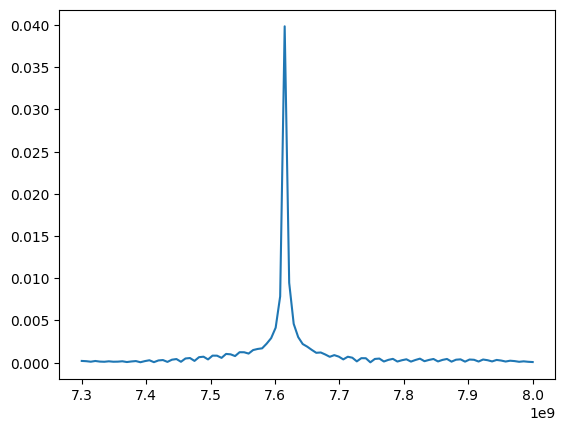

In [3]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

plt.plot(freq, np.abs(data))
plt.show()

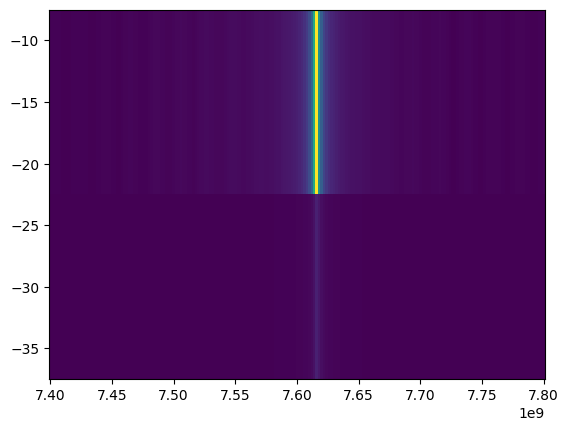

In [4]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


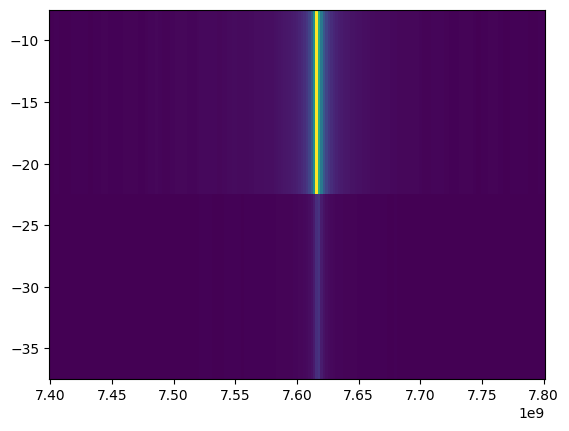

In [5]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)